## importing all the neccesary libraries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

## Task
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

In [2]:
weather_df = pd.read_csv('weatherAUS.csv')
weather_df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

## Linear Regression vs. Logistic Regression
In the previous tutorial, we attempted to predict a person's annual medical charges using linear regression. In this tutorial, we'll use logistic regression, which is better suited for classification problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a classfication or regression problem is an important first step in machine learning.

Classification Problems
Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

Here are some examples of classification problems:

Rainfall prediction: Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")

Breast cancer detection: Predicting whether a tumor is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.

Loan Repayment Prediction - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.

Handwritten Digit Recognition - Identifying which digit from 0 to 9 a picture of handwritten text represents.
Can you think of some more classification problems?

## Regression Problems
Problems where a continuous numeric value must be predicted for each input are known as regression problems.

Here are some example of regression problems:

Medical Charges Prediction
House Price Prediction
Ocean Temperature Prediction
Weather Temperature Prediction
Can you think of some more regression problems?

EXERCISE: Replicate the steps followed in the previous tutorial with each of the above datasets.

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weather_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [5]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [7]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
weather_df.Location.nunique()

49

In [10]:
px.histogram(weather_df, x = 'Location', title='Location vs. Rainy Days', color='RainToday')

In [11]:
px.histogram(weather_df,
             x= 'Temp3pm',
             title= 'Temperature at 3 pm vs. Rain Tomorrow',
             color = 'RainTomorrow')

In [12]:
px.histogram(weather_df, 
             x= 'RainTomorrow', 
             color = 'RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [13]:
px.scatter(weather_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x = 'Temp3pm',
           y = 'Humidity3pm',
           color='RainTomorrow')

In [14]:
px.histogram(weather_df.sample(2000),
                 title='Rainfall',
                 x='RainToday',
                 color='Rainfall',)

In [15]:
px.scatter(weather_df.sample(1000), 
             x= 'MinTemp', 
             color = 'MaxTemp',
             title='MaxTemp vs. MinTemp')

In [16]:
px.scatter(weather_df.sample(1000),
           title='Temp (9 pm) vs. Temp (3 pm)',
           x = 'Temp3pm',
           color = 'Temp9am'
           )

In [17]:
px.scatter(weather_df.sample(1000),
       x = 'MaxTemp',
       color = 'Rainfall',
       title='MaxTemp vs. Rainfall')

In [18]:
px.box(weather_df.sample(1000),
          x = 'Humidity3pm',
          color = 'RainTomorrow',
          title='Humidity3pm vs. RainTomorrow')

In [19]:
px.scatter(weather_df.sample(1000),
        x = 'Date',
        color= 'Rainfall',
        title= 'Date vs. Temp')

In [20]:
px.scatter(weather_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [21]:
use_sample = True
sample_fraction = 0.1
if use_sample:
    weather_df = weather_df.sample(frac = sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_val_df, test_df = train_test_split(weather_df, test_size= 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42 )

In [24]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (8447, 23)
val_df.shape (2816, 23)
test_df.shape (2816, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

C:\Users\idree\AppData\Local\Temp\ipykernel_25760\3518803483.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\idree\AppData\Local\Temp\ipykernel_25760\3518803483.py:2: UserWarning:


The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.



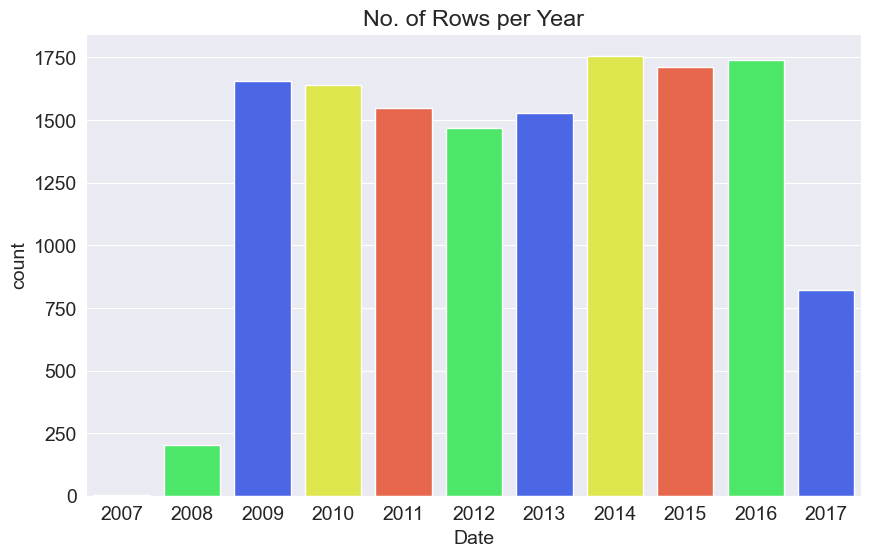

In [25]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year, palette=['#FF5733', '#33FF57', '#3357FF', '#F3FF33']);

In [26]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [27]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (9808, 23)
val_df.shape (1713, 23)
test_df.shape (2558, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [28]:
train_df

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
19937   2014-04-01    NorahHead     18.4     26.2       0.0          NaN   
15668   2010-07-16    Newcastle      4.0     16.4       0.1          NaN   
24225   2009-03-08      Penrith     18.8     25.1       0.0          NaN   
60154   2014-09-02      Bendigo      3.5     14.6       9.6          NaN   
55837   2010-12-06     Ballarat     13.0     25.4       0.0          NaN   
...            ...          ...      ...      ...       ...          ...   
60161   2014-09-09      Bendigo     12.3     21.0       4.6          NaN   
78752   2011-02-03     Watsonia     17.4     27.4       0.0          6.0   
113438  2014-04-01  Witchcliffe     13.2     19.8       2.6          NaN   
141205  2014-06-23       Darwin     19.7     31.6       0.0          6.8   
683     2010-10-15       Albury     13.8     18.6      22.2          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
19937        NaN          NE           31.0        NaN  ...        85.0   
15668        NaN         NaN            NaN        NaN  ...        68.0   
24225        NaN         SSE           39.0        SSW  ...        77.0   
60154        NaN         SSW           46.0         SW  ...        79.0   
55837        NaN         NNE           43.0        NNE  ...        72.0   
...          ...         ...            ...        ...  ...         ...   
60161        NaN           N           48.0        NNE  ...        90.0   
78752        2.9           W           37.0        SSW  ...        99.0   
113438       NaN           S           46.0          S  ...        56.0   
141205      11.0         ESE           48.0        ESE  ...        42.0   
683          NaN         WNW           63.0        NNW  ...        93.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
19937          77.0       1019.7       1017.7       NaN       NaN     21.0   
15668          50.0          NaN          NaN       1.0       2.0      9.0   
24225          67.0          NaN          NaN       NaN       NaN     20.9   
60154          61.0       1018.0       1018.7       NaN       8.0      9.8   
55837          65.0       1011.2       1009.2       6.0       NaN     21.7   
...             ...          ...          ...       ...       ...      ...   
60161          64.0       1007.4       1002.4       8.0       8.0     13.1   
78752          61.0       1014.9       1013.8       8.0       5.0     17.5   
113438         51.0       1020.0       1019.5       NaN       NaN     16.1   
141205         15.0       1016.9       1011.8       1.0       0.0     23.3   
683            90.0        989.8        982.9       8.0       8.0     18.5   

        Temp3pm  RainToday  RainTomorrow  
19937      23.9         No            No  
15668      15.5         No            No  
24225      23.4         No           Yes  
60154      12.6        Yes            No  
55837      24.3         No           Yes  
...         ...        ...           ...  
60161      19.5        Yes            No  
78752      25.0         No           Yes  
113438     18.2        Yes            No  
141205     30.9         No            No  
683        17.1        Yes           Yes  

[9808 rows x 23 columns]

In [29]:
val_df

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
8457    2015-11-03             Cobar     20.4     27.7       0.0          8.2   
17346   2015-05-18         Newcastle     14.0     19.4       0.2          NaN   
101958  2015-11-09      MountGambier     15.8     34.0       0.0          7.2   
54220   2015-01-26       MountGinini      5.3     14.2       0.0          NaN   
5429    2015-10-15     BadgerysCreek     11.3     29.8       0.0          NaN   
...            ...               ...      ...      ...       ...          ...   
101994  2015-12-15      MountGambier     12.6     33.4       0.0          6.8   
66587   2015-10-22  MelbourneAirport      9.6     15.9       6.2          3.0   
132206  2015-03-24            Hobart      6.8     17.3       1.2          4.2   
92576   2015-07-23         GoldCoast     15.4     20.1      23.2          NaN   
74400   2015-11-24              Nhil      8.5     27.2       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
8457         NaN          SW           33.0        ENE  ...        51.0   
17346        NaN         NaN            NaN        NaN  ...        81.0   
101958       8.0           W           52.0          N  ...        24.0   
54220        NaN         ENE           33.0         NE  ...        98.0   
5429         NaN           E           24.0         NW  ...       100.0   
...          ...         ...            ...        ...  ...         ...   
101994      12.6           S           35.0          E  ...        40.0   
66587        0.0           S           48.0         SW  ...        81.0   
132206       9.2           N           30.0        NNW  ...        65.0   
92576        NaN          SE           41.0        SSW  ...       100.0   
74400        NaN           W           54.0        WSW  ...        57.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
8457           43.0       1012.7       1013.5       7.0       8.0     22.8   
17346          75.0          NaN          NaN       8.0       8.0     16.6   
101958         32.0       1015.0       1013.8       7.0       7.0     24.8   
54220          74.0          NaN          NaN       NaN       NaN      7.4   
5429           39.0          NaN          NaN       NaN       NaN     16.9   
...             ...          ...          ...       ...       ...      ...   
101994         20.0       1014.7       1013.2       1.0       5.0     23.0   
66587          92.0       1019.6       1020.1       8.0       8.0     13.3   
132206         41.0       1017.8       1015.5       6.0       2.0      8.5   
92576          99.0       1025.7       1022.4       NaN       NaN     16.9   
74400          29.0       1018.2       1013.7       NaN       NaN     15.6   

        Temp3pm  RainToday  RainTomorrow  
8457       25.2         No           Yes  
17346      18.8         No            No  
101958     26.0         No            No  
54220      12.4         No            No  
5429       28.7         No            No  
...         ...        ...           ...  
101994     31.3         No            No  
66587      12.6        Yes            No  
132206     15.8        Yes            No  
92576      19.1        Yes           Yes  
74400      24.6         No            No  

[1713 rows x 23 columns]

In [30]:
train_df

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
19937   2014-04-01    NorahHead     18.4     26.2       0.0          NaN   
15668   2010-07-16    Newcastle      4.0     16.4       0.1          NaN   
24225   2009-03-08      Penrith     18.8     25.1       0.0          NaN   
60154   2014-09-02      Bendigo      3.5     14.6       9.6          NaN   
55837   2010-12-06     Ballarat     13.0     25.4       0.0          NaN   
...            ...          ...      ...      ...       ...          ...   
60161   2014-09-09      Bendigo     12.3     21.0       4.6          NaN   
78752   2011-02-03     Watsonia     17.4     27.4       0.0          6.0   
113438  2014-04-01  Witchcliffe     13.2     19.8       2.6          NaN   
141205  2014-06-23       Darwin     19.7     31.6       0.0          6.8   
683     2010-10-15       Albury     13.8     18.6      22.2          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
19937        NaN          NE           31.0        NaN  ...        85.0   
15668        NaN         NaN            NaN        NaN  ...        68.0   
24225        NaN         SSE           39.0        SSW  ...        77.0   
60154        NaN         SSW           46.0         SW  ...        79.0   
55837        NaN         NNE           43.0        NNE  ...        72.0   
...          ...         ...            ...        ...  ...         ...   
60161        NaN           N           48.0        NNE  ...        90.0   
78752        2.9           W           37.0        SSW  ...        99.0   
113438       NaN           S           46.0          S  ...        56.0   
141205      11.0         ESE           48.0        ESE  ...        42.0   
683          NaN         WNW           63.0        NNW  ...        93.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
19937          77.0       1019.7       1017.7       NaN       NaN     21.0   
15668          50.0          NaN          NaN       1.0       2.0      9.0   
24225          67.0          NaN          NaN       NaN       NaN     20.9   
60154          61.0       1018.0       1018.7       NaN       8.0      9.8   
55837          65.0       1011.2       1009.2       6.0       NaN     21.7   
...             ...          ...          ...       ...       ...      ...   
60161          64.0       1007.4       1002.4       8.0       8.0     13.1   
78752          61.0       1014.9       1013.8       8.0       5.0     17.5   
113438         51.0       1020.0       1019.5       NaN       NaN     16.1   
141205         15.0       1016.9       1011.8       1.0       0.0     23.3   
683            90.0        989.8        982.9       8.0       8.0     18.5   

        Temp3pm  RainToday  RainTomorrow  
19937      23.9         No            No  
15668      15.5         No            No  
24225      23.4         No           Yes  
60154      12.6        Yes            No  
55837      24.3         No           Yes  
...         ...        ...           ...  
60161      19.5        Yes            No  
78752      25.0         No           Yes  
113438     18.2        Yes            No  
141205     30.9         No            No  
683        17.1        Yes           Yes  

[9808 rows x 23 columns]

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [31]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [32]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [33]:
target_col

'RainTomorrow'

In [34]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [35]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [36]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [37]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
19937     NorahHead     18.4     26.2       0.0          NaN       NaN   
15668     Newcastle      4.0     16.4       0.1          NaN       NaN   
24225       Penrith     18.8     25.1       0.0          NaN       NaN   
60154       Bendigo      3.5     14.6       9.6          NaN       NaN   
55837      Ballarat     13.0     25.4       0.0          NaN       NaN   
...             ...      ...      ...       ...          ...       ...   
60161       Bendigo     12.3     21.0       4.6          NaN       NaN   
78752      Watsonia     17.4     27.4       0.0          6.0       2.9   
113438  Witchcliffe     13.2     19.8       2.6          NaN       NaN   
141205       Darwin     19.7     31.6       0.0          6.8      11.0   
683          Albury     13.8     18.6      22.2          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
19937           NE           31.0        NaN         NE  ...          19.0   
15668          NaN            NaN        NaN         SE  ...           6.0   
24225          SSE           39.0        SSW         SE  ...          28.0   
60154          SSW           46.0         SW          S  ...          20.0   
55837          NNE           43.0        NNE         NE  ...          17.0   
...            ...            ...        ...        ...  ...           ...   
60161            N           48.0        NNE        NNE  ...          11.0   
78752            W           37.0        SSW        ENE  ...           9.0   
113438           S           46.0          S          S  ...          26.0   
141205         ESE           48.0        ESE         SE  ...          28.0   
683            WNW           63.0        NNW         NE  ...           4.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
19937          85.0         77.0       1019.7       1017.7       NaN   
15668          68.0         50.0          NaN          NaN       1.0   
24225          77.0         67.0          NaN          NaN       NaN   
60154          79.0         61.0       1018.0       1018.7       NaN   
55837          72.0         65.0       1011.2       1009.2       6.0   
...             ...          ...          ...          ...       ...   
60161          90.0         64.0       1007.4       1002.4       8.0   
78752          99.0         61.0       1014.9       1013.8       8.0   
113438         56.0         51.0       1020.0       1019.5       NaN   
141205         42.0         15.0       1016.9       1011.8       1.0   
683            93.0         90.0        989.8        982.9       8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
19937        NaN     21.0     23.9         No  
15668        2.0      9.0     15.5         No  
24225        NaN     20.9     23.4         No  
60154        8.0      9.8     12.6        Yes  
55837        NaN     21.7     24.3         No  
...          ...      ...      ...        ...  
60161        8.0     13.1     19.5        Yes  
78752        5.0     17.5     25.0         No  
113438       NaN     16.1     18.2        Yes  
141205       0.0     23.3     30.9         No  
683          8.0     18.5     17.1        Yes  

[9808 rows x 21 columns]

In [38]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [39]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Let's view some statistics for the numeric columns.

In [40]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9768.000000  9787.000000  9808.000000  6179.000000  5806.000000   
mean     11.923751    22.994513     2.388081     5.289756     7.538374   
std       6.316407     7.054718     8.460821     4.025612     3.835842   
min      -8.500000    -3.800000     0.000000     0.000000     0.000000   
25%       7.400000    17.800000     0.000000     2.600000     4.700000   
50%      11.700000    22.400000     0.000000     4.600000     8.400000   
75%      16.500000    27.900000     0.800000     7.200000    10.700000   
max      31.400000    48.100000   236.800000    82.400000    14.200000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9117.000000   9715.000000   9704.000000  9681.000000  9692.000000   
mean       40.315455     14.078538     18.759687    68.634232    51.287557   
std        13.809765      8.905684      8.845587    19.219206    20.938007   
min         7.000000      0.000000      0.000000     0.000000     0.000000   
25%        31.000000      7.000000     13.000000    57.000000    36.000000   
50%        39.000000     13.000000     19.000000    69.000000    51.000000   
75%        48.000000     19.000000     24.000000    83.000000    66.000000   
max       126.000000     87.000000     78.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8864.000000  8865.000000  6278.000000  6183.000000  9734.000000   
mean   1017.605347  1015.238285     4.314431     4.442342    16.804798   
std       6.997894     6.925717     2.863061     2.706475     6.381798   
min     985.900000   982.900000     0.000000     0.000000    -4.300000   
25%    1013.000000  1010.500000     1.000000     2.000000    12.200000   
50%    1017.600000  1015.300000     5.000000     5.000000    16.500000   
75%    1022.400000  1019.900000     7.000000     7.000000    21.400000   
max    1040.200000  1037.200000     8.000000     8.000000    39.100000   

           Temp3pm  
count  9745.000000  
mean     21.512653  
std       6.891169  
min      -3.200000  
25%      16.500000  
50%      20.900000  
75%      26.200000  
max      46.100000

In [41]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy= 'mean')

In [44]:
weather_df[numeric_cols].isna().sum()

MinTemp            61
MaxTemp            36
Rainfall            0
Evaporation      5987
Sunshine         6673
WindGustSpeed     917
WindSpeed9am      117
WindSpeed3pm      246
Humidity9am       180
Humidity3pm       362
Pressure9am      1429
Pressure3pm      1425
Cloud9am         5303
Cloud3pm         5649
Temp9am            88
Temp3pm           271
dtype: int64

In [45]:
train_df[numeric_cols].isna().sum()

MinTemp            40
MaxTemp            21
Rainfall            0
Evaporation      3629
Sunshine         4002
WindGustSpeed     691
WindSpeed9am       93
WindSpeed3pm      104
Humidity9am       127
Humidity3pm       116
Pressure9am       944
Pressure3pm       943
Cloud9am         3530
Cloud3pm         3625
Temp9am            74
Temp3pm            63
dtype: int64

In [46]:
val_df[numeric_cols].isna().sum()

MinTemp            7
MaxTemp            4
Rainfall           0
Evaporation      847
Sunshine         926
WindGustSpeed     85
WindSpeed9am      12
WindSpeed3pm      38
Humidity9am       25
Humidity3pm       74
Pressure9am      204
Pressure3pm      202
Cloud9am         667
Cloud3pm         708
Temp9am            6
Temp3pm           57
dtype: int64

In [47]:
test_df[numeric_cols].isna().sum()

MinTemp            14
MaxTemp            11
Rainfall            0
Evaporation      1511
Sunshine         1745
WindGustSpeed     141
WindSpeed9am       12
WindSpeed3pm      104
Humidity9am        28
Humidity3pm       172
Pressure9am       281
Pressure3pm       280
Cloud9am         1106
Cloud3pm         1316
Temp9am             8
Temp3pm           151
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [48]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [49]:
list(imputer.statistics_)

[np.float64(12.055657012412613),
 np.float64(23.16733603930784),
 np.float64(2.3916471340294057),
 np.float64(5.45365793376174),
 np.float64(7.536862003780717),
 np.float64(39.964443093754745),
 np.float64(13.946211144535168),
 np.float64(18.614472637894888),
 np.float64(68.90992157709188),
 np.float64(51.42152074068674),
 np.float64(1017.7524584980237),
 np.float64(1015.3576813655761),
 np.float64(4.457269826800364),
 np.float64(4.5508896797153024),
 np.float64(16.922278607676365),
 np.float64(21.617895422943217)]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [50]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [51]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.